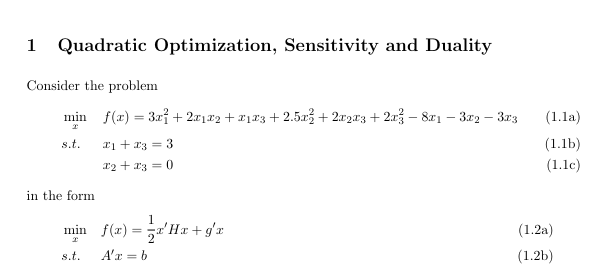

In [121]:
import sympy
import numpy as np
sympy.init_printing()
from sympy import symbols, Matrix, Array

def concat(X,Y):
    
    return list(X) + list(Y)

In [122]:
x = sympy.Array(symbols("x1:4", real=True))
H = 2* np.array([[3, 2,1],[0,2.5,2],[0,0,2]])
g = np.array([-8,-3,-3])

In [123]:
f = 1/2 * (x @ H @ x).expand() + g @ x
f

In [124]:
A = np.array([[1,0,1],[0,1,1]])
b = np.array([3,0])

In [125]:
A @ x,b

(array([x1 + x3, x2 + x3], dtype=object), array([3, 0]))

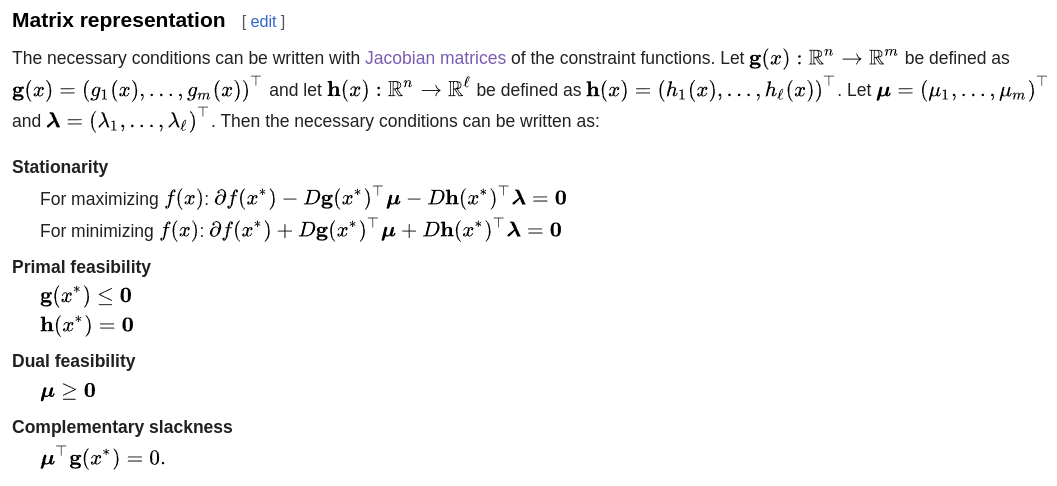

In [126]:
w = sympy.Array(A @ x - b)
stationarity = f.diff(x) - np.array(w.diff(x)) @ sympy.Array(symbols(f"mu1:{len(x)}", real=True))
KKT = concat(stationarity, w)
display(KKT)
sympy.solve(KKT)

In [46]:
# constraints
A @ np.array([2,-1,1]) - b

array([0, 0])

In [48]:
# loss
np.array([2,-1,1]) @ H @ np.array([2,-1,1]) + g @ np.array([2,-1,1])

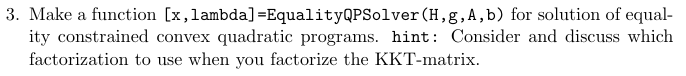

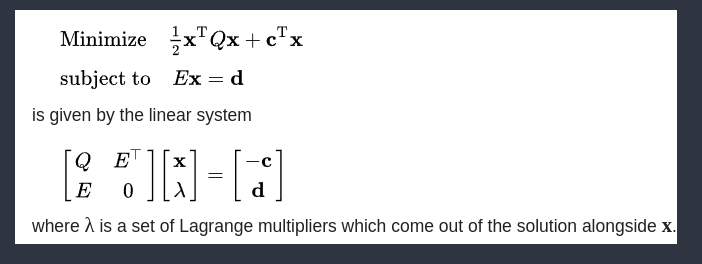

In [107]:
def EqualityQPSolver(H,g,A,b):
    shape = (A.shape[0], A.shape[0])
    X = np.block([[H, A.T],[A, np.zeros(shape)]])
    z = np.block([-g,b])
    return np.linalg.solve(X,z)

In [108]:
EqualityQPSolver(H,g,A,b)

array([ 2.23076923, -0.76923077,  0.76923077, -3.84615385,  3.76923077])

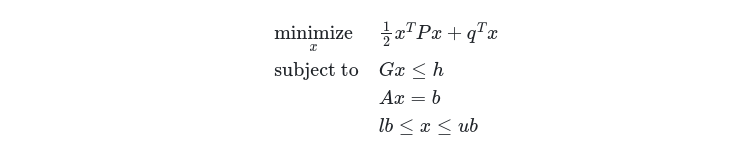

In [115]:
import numpy as np
from qpsolvers import solve_qp

M = np.array([[1.0, 2.0, 0.0], [-8.0, 3.0, 2.0], [0.0, 1.0, 1.0]])
P = H  # this is a positive definite matrix
q = g
G = None
h = None
A = A
b = b

x = solve_qp(P, q, G, h, A, b, solver="clarabel")
print(f"QP solution: {x = }")

QP solution: x = array([ 1.54545455, -1.45454545,  1.45454545])


/home/kjb/python-venvs/dtu/lib/python3.11/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/home/kjb/python-venvs/dtu/lib/python3.11/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [116]:
x @ H @ x+ g @ x

In [119]:
x2 = np.array([ 2.23076923, -0.76923077,  0.76923077])
x2 @ H @ x2 + g @ x2

In [118]:
A @ x - b

array([ 4.44089210e-16, -2.22044605e-16])

In [120]:
A @ x2 - b

array([0., 0.])

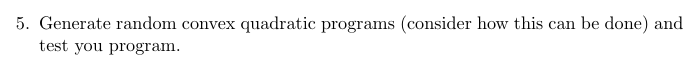

In [ ]:
import numpy as np
from qpsolvers import solve_qp

M = np.array([[1.0, 2.0, 0.0], [-8.0, 3.0, 2.0], [0.0, 1.0, 1.0]])
P = M.T @ M  # this is a positive definite matrix
q = np.array([3.0, 2.0, 3.0]) @ M
G = np.array([[1.0, 2.0, 1.0], [2.0, 0.0, 1.0], [-1.0, 2.0, -1.0]])
h = np.array([3.0, 2.0, -2.0])
A = np.array([1.0, 1.0, 1.0])
b = np.array([1.0])

x = solve_qp(P, q, G, h, A, b, solver="proxqp")
print(f"QP solution: {x = }")

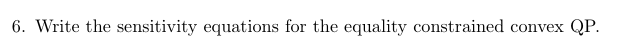

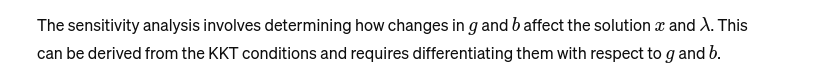

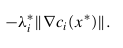

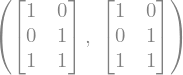

In [130]:
sympy.Array(A @ x - b).diff(x), sympy.Matrix(A.T)

In [134]:
-sympy.Array(np.linalg.norm(A.T,axis=-1) * sympy.symbols("lambda1:4",real=True))

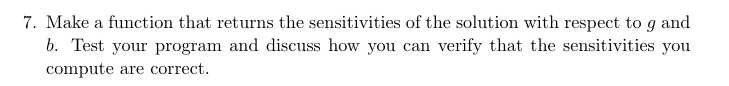

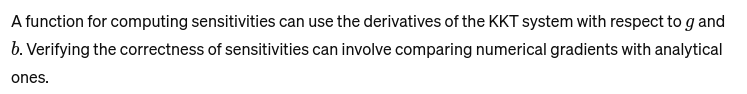

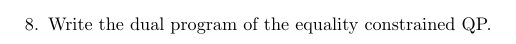

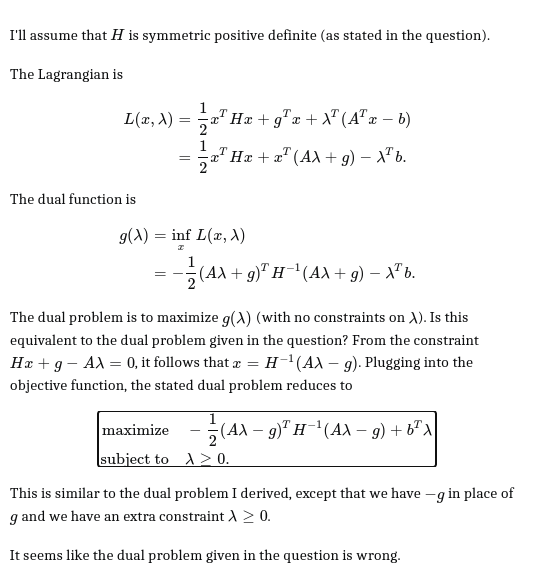

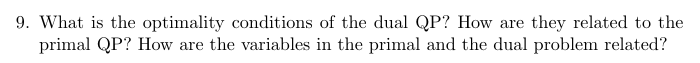

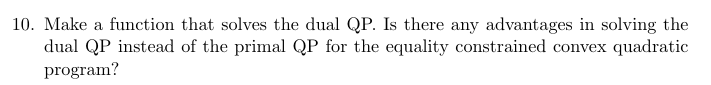